In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('Datasets/dataset_mood_smartphone.csv')
input_df = df.copy()

#split date and time
df['date'] = pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time

grouped_df = df.groupby(['id', 'date', 'time', 'variable']).sum().reset_index()

#create dataframe of values per id per date per time
df = grouped_df.pivot_table(index=['id', 'date', 'time'], columns='variable', values='value')

In [27]:
#number of records that gets lost
len(input_df) - len(df)

17986

In [3]:
#create dataframe with properties of data
df_properties = pd.DataFrame(columns=['Attribute', 'Type', 'Unique Values', 'Missing Values', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'])
df_properties['Attribute'] = df.columns.values
df_properties['Type'] = df.dtypes.values
df_properties['Unique Values'] = df.nunique().values
df_properties['Missing Values'] = df.isnull().sum().values
df_properties['Mean'] = df.mean().values
df_properties['Std'] = df.std().values
df_properties['Min'] = df.min().values
df_properties['25%'] = df.quantile(0.25).values
df_properties['50%'] = df.quantile(0.5).values
df_properties['75%'] = df.quantile(0.75).values
df_properties['Max'] = df.max().values
df_properties

,Attribute,Type,Unique Values,Missing Values,Mean,Std,Min,25%,50%,75%,Max
0,activity,float64,1868,335961,0.115958,0.186946,0.000,0.00000,0.021739,0.158333,1.000
1,appCat.builtin,float64,23237,267638,18.538262,415.989243,-82798.871,2.02000,4.038000,9.922000,33960.246
2,appCat.communication,float64,39890,284650,43.343792,128.912750,0.006,5.21800,16.225500,45.475750,9830.777
3,appCat.entertainment,float64,12575,331801,37.576480,262.960476,-0.011,1.33400,3.391000,14.922000,32148.677
4,appCat.finance,float64,729,357987,21.755251,39.218361,0.131,4.07200,8.026000,20.155000,355.513
5,appCat.game,float64,792,358113,128.391615,327.145246,1.003,14.14800,43.168000,123.625000,5491.793
6,appCat.office,float64,3178,353284,22.578892,449.601382,0.003,2.00400,3.106000,8.043750,32708.818
7,appCat.other,float64,5014,351276,25.810839,112.781355,0.014,7.01900,10.028000,16.829250,3892.038
8,appCat.social,float64,14660,339781,72.401906,261.551846,0.094,9.03000,28.466000,75.372000,30000.906
9,appCat.travel,float64,2606,356080,45.730850,246.109307,0.080,5.08650,18.144000,47.227250,10452.615


Notably large differences between max values and 75%-quantile values for almost every attribute. Additionally, mean value for almost every attribute is larger than median \(50%-quantile) value. These two observations indicate extreme outliers.

Range of values for mood is (1.00,16.00), even though the maximum value for mood should be 10.
The minimum value for both circumplex.arousal and circumplex.valence is -3.00, although the scale is (-2,2).

In [4]:
df.mood.value_counts()

7.0     2579
8.0     1426
6.0     1001
5.0      255
9.0      215
4.0       90
10.0      18
3.0       17
2.0       13
13.0       5
1.0        3
15.0       2
11.0       1
12.0       1
16.0       1
14.0       1
Name: mood, dtype: int64

This represents the count of each value for mood in descending order. It has the most values concentrated in categories 7, 8 and 6. There are only a few values in category 1, 2 and 3.

In [5]:
#add the time as column
df['time_agg'] = df.index.get_level_values(2)

#round time to nearest 15 minutes and remove seconds and microseconds
# df['time_agg'] = df['time_agg'].apply(lambda x: x.replace(second=0, microsecond=0, minute=x.minute // 15 * 15))
df['time_agg'] = df['time_agg'].apply(lambda x: x.hour*100 + (x.minute // 15 * 25))

df['time_agg']

id       date        time           
AS14.01  2014-02-17  12:04:42.394000    1200
                     18:28:25.520000    1825
         2014-02-18  09:29:51.257000     925
         2014-02-19  14:43:30.575000    1450
                     17:29:10.378000    1725
                                        ... 
AS14.33  2014-05-30  22:32:05.016000    2250
                     22:32:11.049000    2250
                     22:32:14.240000    2250
                     22:32:15.246000    2250
         2014-05-31  12:00:00           1200
Name: time_agg, Length: 358926, dtype: int64

In [6]:
df.columns


Index(['activity', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call',
       'circumplex.arousal', 'circumplex.valence', 'mood', 'screen', 'sms',
       'time_agg'],
      dtype='object', name='variable')

In [7]:
#reorder columns (start with time)
df = df[['time_agg', 'mood', 'activity', 'circumplex.arousal', 'circumplex.valence',  'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather']]
df

variable                            time_agg  mood  activity  \
id      date       time                                        
AS14.01 2014-02-17 12:04:42.394000      1200   NaN       NaN   
                   18:28:25.520000      1825   NaN       NaN   
        2014-02-18 09:29:51.257000       925   NaN       NaN   
        2014-02-19 14:43:30.575000      1450   NaN       NaN   
                   17:29:10.378000      1725   NaN       NaN   
...                                      ...   ...       ...   
AS14.33 2014-05-30 22:32:05.016000      2250   NaN       NaN   
                   22:32:11.049000      2250   NaN       NaN   
                   22:32:14.240000      2250   NaN       NaN   
                   22:32:15.246000      2250   NaN       NaN   
        2014-05-31 12:00:00             1200   7.0       NaN   

variable                            circumplex.arousal  circumplex.valence  \
id      date       time                                                      
AS14.01 2014-02-17 12:04:42.394000                 NaN                 NaN   
                   18:28:25.520000                 NaN                 NaN   
        2014-02-18 09:29:51.257000                 NaN                 NaN   
        2014-02-19 14:43:30.575000                 NaN                 NaN   
                   17:29:10.378000                 NaN                 NaN   
...                                                ...                 ...   
AS14.33 2014-05-30 22:32:05.016000                 NaN                 NaN   
                   22:32:11.049000                 NaN                 NaN   
                   22:32:14.240000                 NaN                 NaN   
                   22:32:15.246000                 NaN                 NaN   
        2014-05-31 12:00:00                       -2.0                 1.0   

variable                            screen  call  sms  appCat.builtin  \
id      date       time                                                 
AS14.01 2014-02-17 12:04:42.394000     NaN   1.0  NaN             NaN   
                   18:28:25.520000     NaN   1.0  NaN             NaN   
        2014-02-18 09:29:51.257000     NaN   1.0  NaN             NaN   
        2014-02-19 14:43:30.575000     NaN   1.0  NaN             NaN   
                   17:29:10.378000     NaN   1.0  NaN             NaN   
...                                    ...   ...  ...             ...   
AS14.33 2014-05-30 22:32:05.016000     NaN   NaN  NaN             NaN   
                   22:32:11.049000     NaN   NaN  NaN           3.122   
                   22:32:14.240000     NaN   NaN  NaN           1.003   
                   22:32:15.246000     NaN   NaN  NaN           4.134   
        2014-05-31 12:00:00            NaN   NaN  NaN             NaN   

variable                            appCat.communication  \
id      date       time                                    
AS14.01 2014-02-17 12:04:42.394000                   NaN   
                   18:28:25.520000                   NaN   
        2014-02-18 09:29:51.257000                   NaN   
        2014-02-19 14:43:30.575000                   NaN   
                   17:29:10.378000                   NaN   
...                                                  ...   
AS14.33 2014-05-30 22:32:05.016000                   NaN   
                   22:32:11.049000                   NaN   
                   22:32:14.240000                   NaN   
                   22:32:15.246000                   NaN   
        2014-05-31 12:00:00                          NaN   

variable                            appCat.entertainment  appCat.finance  \
id      date       time                                                    
AS14.01 2014-02-17 12:04:42.394000                   NaN             NaN   
                   18:28:25.520000                   NaN             NaN   
        2014-02-18 09:29:51.257000                   NaN             NaN   
        2014-02-19 14:43:30.575000       

In [8]:
#create overview of features with values representing length of time
time_feats = ['appCat.builtin', 'appCat.communication',
'appCat.entertainment', 'appCat.finance', 'appCat.game',
'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
'appCat.unknown', 'appCat.utilities', 'appCat.weather',
'screen',]

#create overview of features with values representing user created ratings
user_feats = ['circumplex.arousal', 'circumplex.valence','mood', 'activity']

#rest features
rest_feats = ['call', 'sms', ]

df.columns

Index(['time_agg', 'mood', 'activity', 'circumplex.arousal',
       'circumplex.valence', 'screen', 'call', 'sms', 'appCat.builtin',
       'appCat.communication', 'appCat.entertainment', 'appCat.finance',
       'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social',
       'appCat.travel', 'appCat.unknown', 'appCat.utilities',
       'appCat.weather'],
      dtype='object', name='variable')

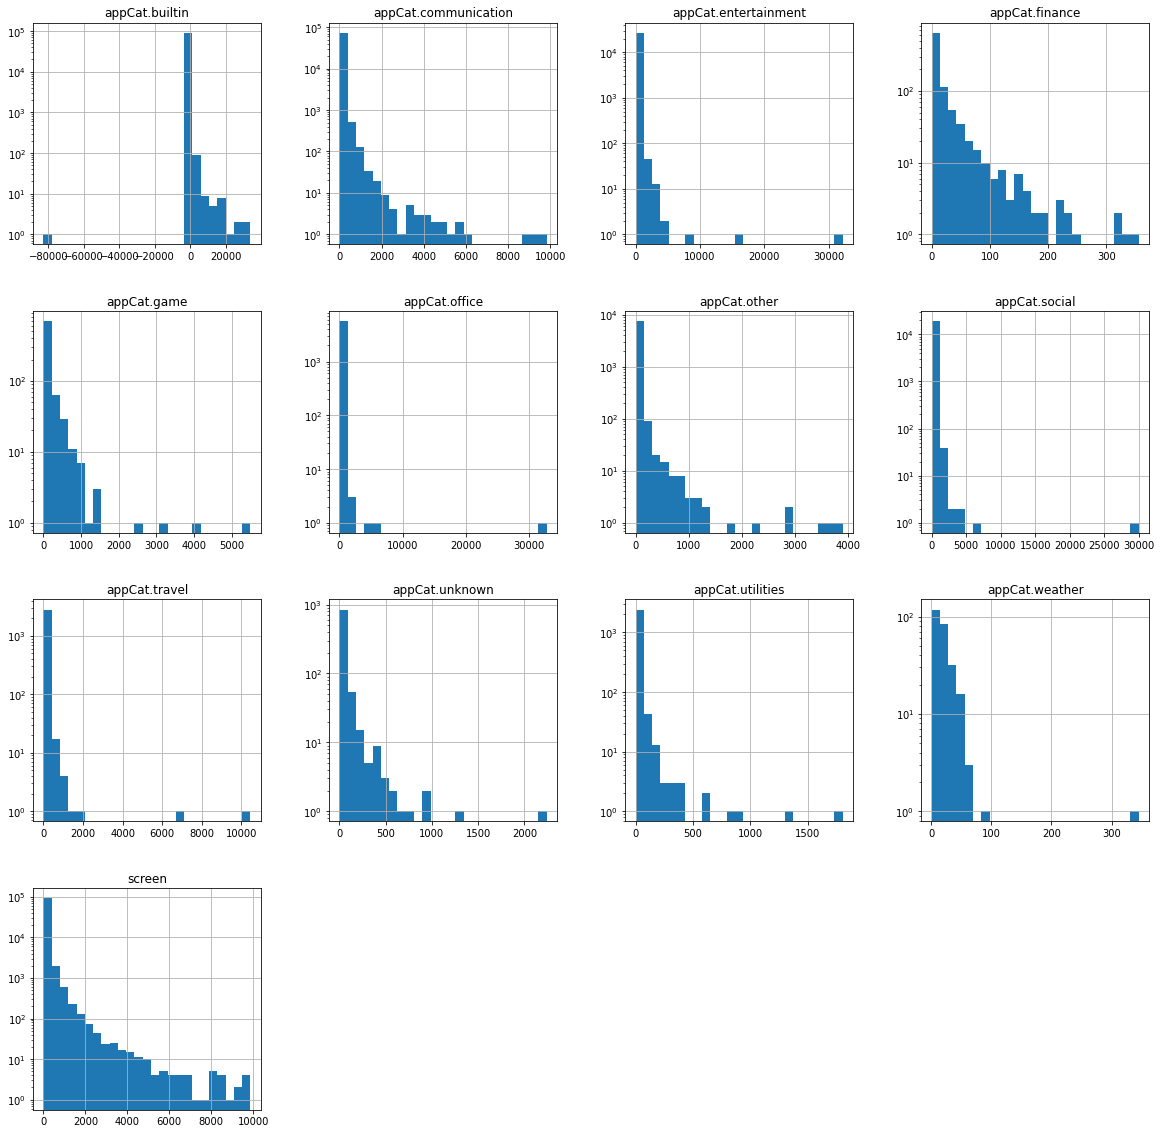

In [9]:
#distribution of values for time attributes
df[time_feats].hist(figsize=(20,20), bins=25 , log=True)
plt.show()

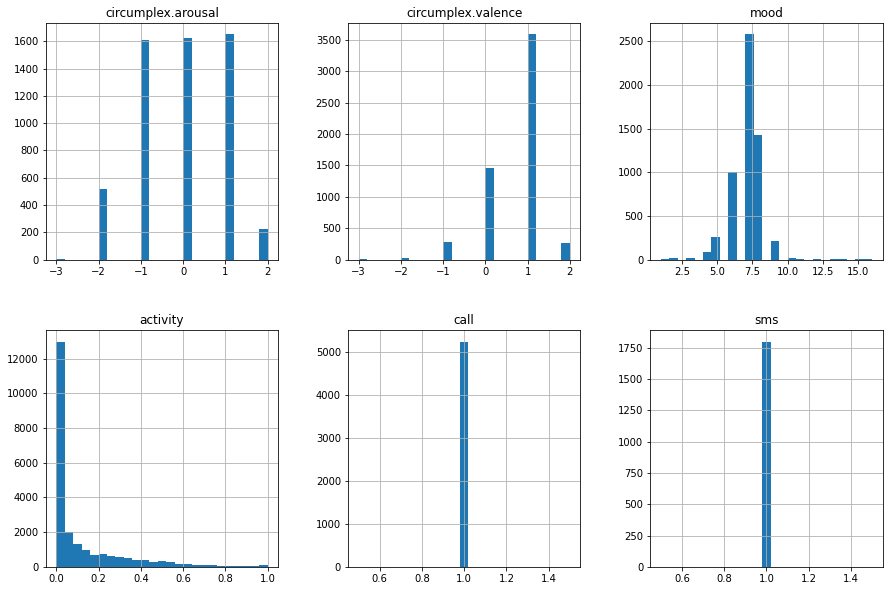

In [10]:
#distribution of values for other attributes
df[user_feats +rest_feats].hist(figsize=(15,10), bins=25, layout=(2,3))
plt.show()

Activity is right skewed. Rest of the attributes do not seem to have a clear distribution. Mood is somewhat normally distributed. 

/var/folders/k0/0lwkwvkd1mv58kbv8hrhv1q00000gn/T/ipykernel_69168/3981562812.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mood'], bins=25)


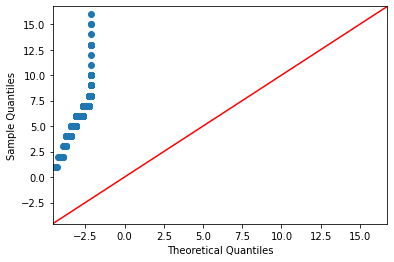

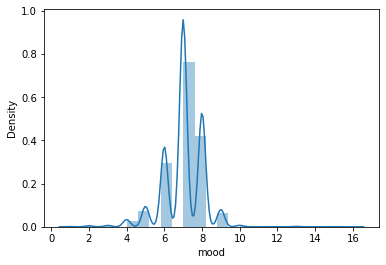

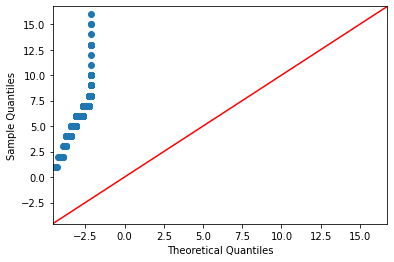

In [11]:
#check if mood is normally distributed
sns.distplot(df['mood'], bins=25)

#create qqplot for mood
import statsmodels.api as sm
sm.qqplot(df['mood'], line='45')

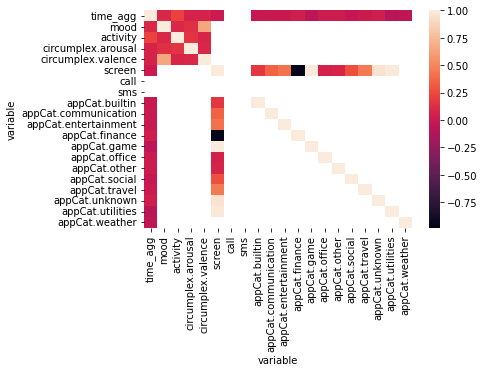

screen  -  appCat.finance :  -0.984
screen  -  appCat.game :  0.998
screen  -  appCat.unknown :  0.947
screen  -  appCat.utilities :  0.984
appCat.finance  -  screen :  -0.984
appCat.game  -  screen :  0.998
appCat.unknown  -  screen :  0.947
appCat.utilities  -  screen :  0.984


In [12]:
#correlation matrix for all attributes
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

#print correlations between attributes with a value of more than 0.8
for col in corr.columns:
    for row in corr.index:
        if abs(corr[col][row]) > 0.8 and corr[col][row] < 1:
            print(col, ' - ', row, ': ', round(corr[col][row],3))

It seems like duration of screen activity has a positive correlation with the duration of usage of game apps, utilities apps and unknown apps. For the rest there are no strong correlations.

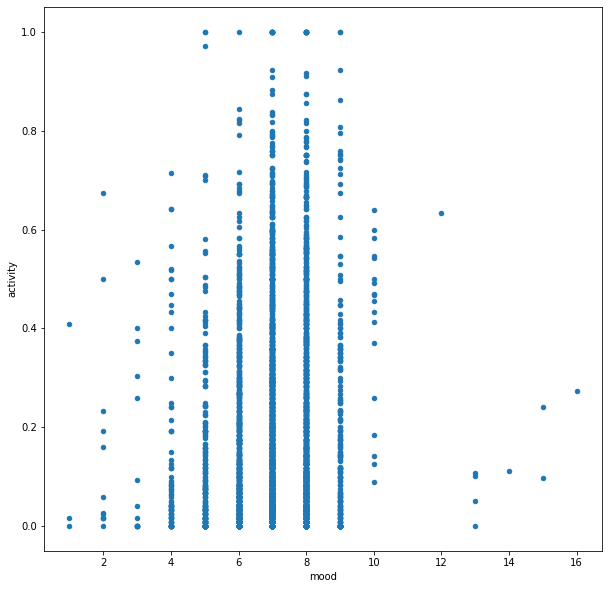

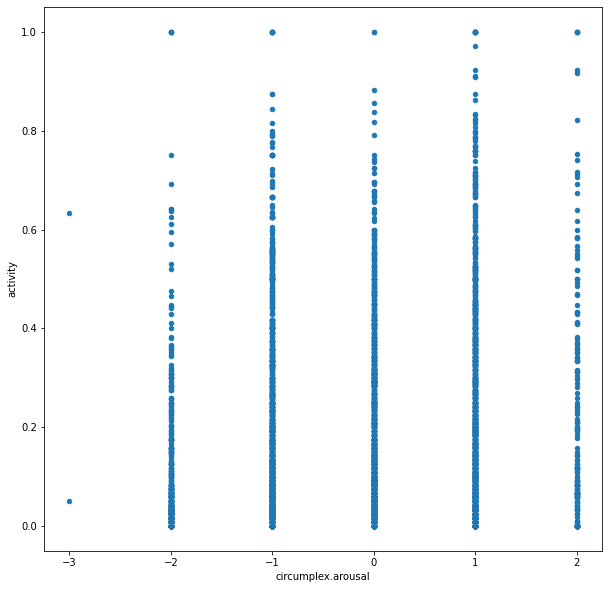

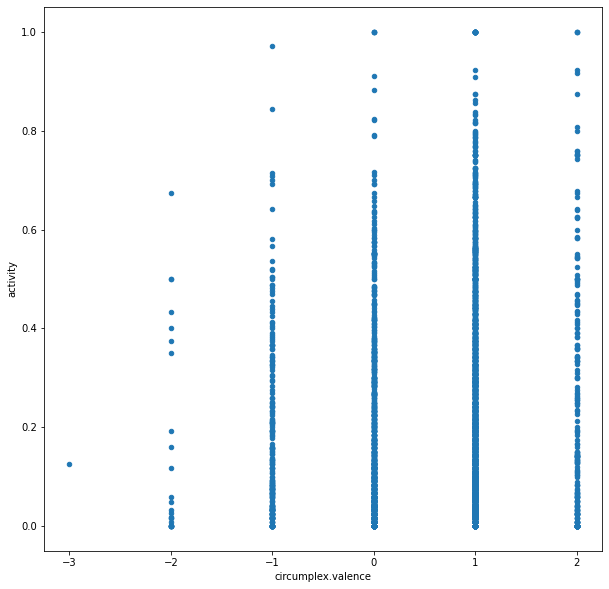

In [13]:
#create plot for mood and activity
df.plot.scatter(x='mood', y='activity', figsize=(10,10))
plt.show()

#create plot for arousal and activity
df.plot.scatter(x='circumplex.arousal', y='activity', figsize=(10,10))
plt.show()

#create plot for valence and activity
df.plot.scatter(x='circumplex.valence', y='activity', figsize=(10,10))
plt.show()

In [14]:
#find unique ids
unique_users = df.index.get_level_values(0).unique()
unique_users

Index(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'],
      dtype='object', name='id')

In [15]:
df.head()

variable                            time_agg  mood  activity  \
id      date       time                                        
AS14.01 2014-02-17 12:04:42.394000      1200   NaN       NaN   
                   18:28:25.520000      1825   NaN       NaN   
        2014-02-18 09:29:51.257000       925   NaN       NaN   
        2014-02-19 14:43:30.575000      1450   NaN       NaN   
                   17:29:10.378000      1725   NaN       NaN   

variable                            circumplex.arousal  circumplex.valence  \
id      date       time                                                      
AS14.01 2014-02-17 12:04:42.394000                 NaN                 NaN   
                   18:28:25.520000                 NaN                 NaN   
        2014-02-18 09:29:51.257000                 NaN                 NaN   
        2014-02-19 14:43:30.575000                 NaN                 NaN   
                   17:29:10.378000                 NaN                 NaN   

variable                            screen  call  sms  appCat.builtin  \
id      date       time                                                 
AS14.01 2014-02-17 12:04:42.394000     NaN   1.0  NaN             NaN   
                   18:28:25.520000     NaN   1.0  NaN             NaN   
        2014-02-18 09:29:51.257000     NaN   1.0  NaN             NaN   
        2014-02-19 14:43:30.575000     NaN   1.0  NaN             NaN   
                   17:29:10.378000     NaN   1.0  NaN             NaN   

variable                            appCat.communication  \
id      date       time                                    
AS14.01 2014-02-17 12:04:42.394000                   NaN   
                   18:28:25.520000                   NaN   
        2014-02-18 09:29:51.257000                   NaN   
        2014-02-19 14:43:30.575000                   NaN   
                   17:29:10.378000                   NaN   

variable                            appCat.entertainment  appCat.finance  \
id      date       time                                                    
AS14.01 2014-02-17 12:04:42.394000                   NaN             NaN   
                   18:28:25.520000                   NaN             NaN   
        2014-02-18 09:29:51.257000                   NaN             NaN   
        2014-02-19 14:43:30.575000                   NaN             NaN   
                   17:29:10.378000                   NaN             NaN   

variable                            appCat.game  appCat.office  appCat.other  \
id      date       time                                                        
AS14.01 2014-02-17 12:04:42.394000          NaN            NaN           NaN   
                   18:28:25.520000          NaN            NaN           NaN   
        2014-02-18 09:29:51.257000          NaN            NaN           NaN   
        2014-02-19 14:43:30.575000          NaN            NaN           NaN   
                   17:29:10.378000          NaN            NaN           NaN   

variable                            appCat.social  appCat.travel  \
id      date       time                                            
AS14.01 2014-02-17 12:04:42.394000            NaN            NaN   
                   18:28:25.520000            NaN            NaN   
        2014-02-18 09:29:51.257000            NaN            NaN   
        2014-02-19 14:43:30.575000            NaN            NaN   
                   17:29:10.378000            NaN            NaN   

variable                            appCat.unknown  appCat.utilities  \
id      date       time                                                
AS14.01 2014-02-17 12:04:42.394000             NaN               NaN   
                   18:28:25.520000             NaN               NaN   
        2014-02-18 09:29:51.257000             NaN               NaN   
        2014-02-19 14:43:30.575000             NaN               NaN   
                   17:29:10.378000             NaN               NaN

In [16]:
start = 200
end = start + 40

period_df = pd.DataFrame(columns=['id', 'min_date', 'max_date', 'user_period', 'mood_period'])

for user in unique_users:
    user_df = df.loc[df.index.get_level_values(0)==user]
    # print(test)
    
    #find range of dates of user
    min_date = user_df.index.get_level_values(1).min()
    max_date = user_df.index.get_level_values(1).max()

    #find the range of when mood is recorded
    min_mood = user_df['mood'].dropna().index.get_level_values(1).min()
    max_mood = user_df['mood'].dropna().index.get_level_values(1).max()

    #concate to dataframe
    new_row = {'id': user, 'min_date': min_date, 'max_date': max_date, 'user_period': max_date - min_date, 'min_mood': min_mood, 'max_mood':max_mood, 'mood_period': max_mood - min_mood}
    period_df = pd.concat([period_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

period_df

,id,min_date,max_date,user_period,mood_period,min_mood,max_mood
0,AS14.01,2014-02-17,2014-05-05,77 days,67 days,2014-02-26,2014-05-04
1,AS14.02,2014-02-17,2014-04-25,67 days,40 days,2014-03-16,2014-04-25
2,AS14.03,2014-02-17,2014-05-08,80 days,47 days,2014-03-21,2014-05-07
3,AS14.05,2014-02-18,2014-05-05,76 days,52 days,2014-03-14,2014-05-05
4,AS14.06,2014-02-17,2014-05-08,80 days,45 days,2014-03-24,2014-05-08
5,AS14.07,2014-03-17,2014-05-05,49 days,47 days,2014-03-19,2014-05-05
6,AS14.08,2014-02-17,2014-05-05,77 days,61 days,2014-03-05,2014-05-05
7,AS14.09,2014-02-17,2014-05-05,77 days,45 days,2014-03-21,2014-05-05
8,AS14.12,2014-02-19,2014-05-05,75 days,51 days,2014-03-15,2014-05-05
9,AS14.13,2014-02-17,2014-05-04,76 days,52 days,2014-03-13,2014-05-04


In [17]:
min(period_df.min_date)
max(period_df.max_date)

datetime.date(2014, 6, 9)

In [18]:
#find number of days
(max(period_df.max_date)- min(period_df.min_date)).days


112

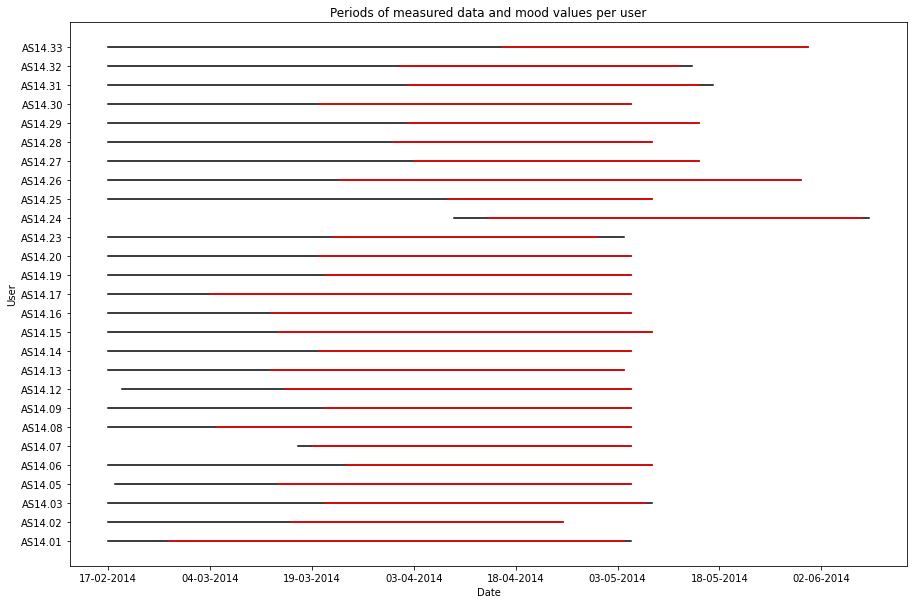

In [26]:
#make a function to dispay the different periods of every user in a single plot
def plot_periods(period_df, start=0, end=30):
    #create figure
    fig, ax = plt.subplots(figsize=(15,10))
    
    #plot the periods of the users
    for i in range(start, end):
        ax.plot([period_df.iloc[i].min_date, period_df.iloc[i].max_date], [i, i], color='black')
        ax.plot([period_df.iloc[i].min_mood, period_df.iloc[i].max_mood], [i, i], color='red')
    
    #set the yticks
    ax.set_yticks(range(start, end))
    ax.set_yticklabels(period_df.iloc[start:end].id)
    
    #set the xticks for every 15 days
    frq = '15D'
    ax.set_xticks(pd.date_range(period_df.min_date.min(), period_df.max_date.max(), freq=frq))
    ax.set_xticklabels(pd.date_range(period_df.min_date.min(), period_df.max_date.max(), freq=frq).strftime('%d-%m-%Y'))

    #set the title
    ax.set_title('Periods of measured data and mood values per user')
    
    #set the labels
    ax.set_xlabel('Date')
    ax.set_ylabel('User')
    
    #show the plot
    plt.show()

plot_periods(period_df, start=0, end=len(period_df))